In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

#### 1. Write a Python function to perform K-Means clustering on a given dataset without using libraries like scikit-learn. This tests your understanding of clustering algorithms and your ability to implement them manually.

In [9]:
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42

X, y_true = make_blobs(n_samples=n_samples, 
                       centers=n_clusters, 
                       n_features=n_features,
                       cluster_std=1.0,
                       random_state=random_state)

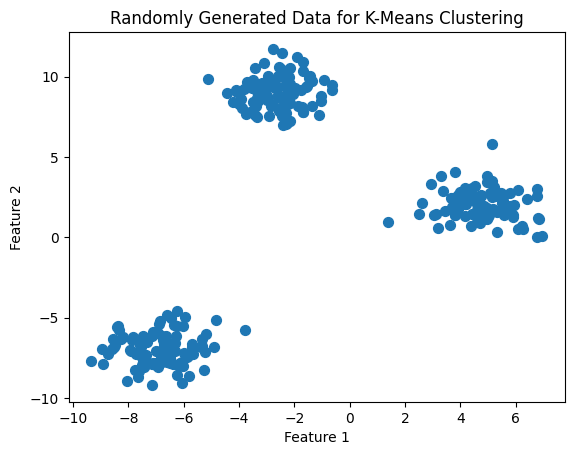

In [10]:
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Randomly Generated Data for K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [11]:
k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }
    
    clusters[idx] = cluster
    

In [12]:
clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

In [8]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [13]:
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []
        
        curr_x = X[idx]
        
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center
            
            clusters[i]['points'] = []
    return clusters

In [14]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

In [15]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)

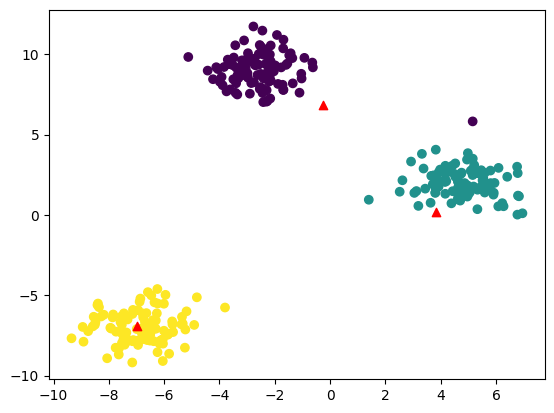

In [16]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()